# Modeling for all studies

In [207]:
# import import_ipynb
# import us_common_functions

# Setting variables

In [208]:
#####################################################################################
run_models = True
overleaf_metrics = False
print_all = False
is_deadline = False
#####################################################################################


#####################################################################################
k_fold_n_splits = 2
#####################################################################################



#####################################################################################
# feature_imp = True
# normalized_feature = True
#####################################################################################


#####################################################################################
arousal_signals = ['PP']
# arousal_signals = ['PP', 'BR']
# arousal_signals = ['PP', 'HR', 'BR', 'PP_HR', 'PP_BR', 'HR_BR', 'PP_HR_BR']
#####################################################################################



#####################################################################################
%run us_common_functions.ipynb
#####################################################################################




#####################################################################################
# ['rf', 'knn', 'linear_svc', 'svc', 'dnn']
model_name = 'rf'
#####################################################################################






####################################################################################
#### study_combinations_to_run = list(study_combinations.keys())
#### study_combinations_to_run = list(study_combinations.keys())[:5]
#### study_combinations_to_run = ['sim1', 'sim1___sim2___tt1___office_tasks']
#### study_combinations_to_run = ['sim1___sim2___tt1___office_tasks']
#### study_combinations_to_run = ['sim1', 'tt1']
#### study_combinations_to_run = ['sim1']
#### study_combinations_to_run.remove(deadline_study)
####################################################################################





#####################################################################################
# All Features - Without Deadline Study
####################################################################################
four_studies = [sim1, sim2, tt1, office_tasks]
study_combinations, all_study_combinations = get_study_combinations(four_studies)
study_combinations_to_run = all_study_combinations


study_combinations_to_run = all_study_combinations[:1]
### study_combinations_to_run = all_study_combinations[:-1]
### study_combinations_to_run = ['sim1___sim2___tt1___office_tasks']
### print(study_combinations_to_run)
####################################################################################




# #####################################################################################
# # For Deadline Study - Without BR
# #####################################################################################
# studies.append(deadline_study)
# study_combinations, all_study_combinations = get_study_combinations(studies)
# study_combinations_to_run = studies
# print(study_combinations_to_run)

# arousal_signals = ['PP', 'HR', 'PP_HR']
# model_features.remove('BR_Mean')
# model_features.remove('BR_SD')

# is_deadline=True
# ####################################################################################





####################################################################################
# ground_truth_method = 'hist'
# ground_truth_method = 'ecdf'
####################################################################################





In [209]:
####################################################################################
# Initialization
####################################################################################
model_metrics = {}
overleaf_final_tables = defaultdict(lambda : None)
study_combination_model_metrics = defaultdict(lambda : None)

# figure_path = all_studies_fig_dir
# plot_name = None
####################################################################################

In [210]:
# data_3_study_combined.csv
# data_3_study_combined_scaled.csv
# data_3_study_combined_nn.csv
# data_3_study_combined_scaled_nn.csv
all_studies_df = pd.read_csv(all_studies_data_dir + 'data_3_study_combined.csv')
all_studies_df.shape

(105514, 34)

In [211]:
all_studies_df.head()

,Unnamed: 0,Subject,Age,NASA_Effort,NASA_Frustration,NASA_Mental,NASA_Performance,NASA_Physical,NASA_Temporal,NASA_Total,Treatment,Gender,Gender_Male,PP_Mean,PP_Median,PP_SD,PP_SS,HR_Mean,HR_Median,HR_SD,HR_SS,BR_Mean,BR_Median,BR_SD,BR_SS,PP_Arousal_Mode,HR_Arousal_Mode,BR_Arousal_Mode,PP_HR_Arousal_Mode,PP_BR_Arousal_Mode,HR_BR_Arousal_Mode,PP_HR_BR_Arousal_Mode,Study_Name,Study_Subject
0,0,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,0.020212,0.029017,0.022537,0.008657,3.708182,3.668182,1.484887,157.350124,-5.414682,-5.416682,0.162809,293.426352,neutral,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
1,1,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.056016,-0.059782,0.010595,0.032388,4.568182,3.968182,1.366260,225.482851,-4.462682,-4.366682,0.352742,200.275130,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
2,2,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.047614,-0.045814,0.007855,0.023226,3.448182,3.668182,1.347261,135.235579,-3.358682,-3.366682,0.355928,113.947596,non-arousal,arousal,non-arousal,neutral,non-arousal,neutral,neutral,sim1,sim1_2
3,3,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.121872,-0.129739,0.022728,0.153176,0.008182,0.168182,1.188089,12.704669,-2.302682,-2.386682,0.319138,53.940076,non-arousal,neutral,non-arousal,non-arousal,non-arousal,neutral,non-arousal,sim1,sim1_2
4,4,2,23.0,17.0,11.0,18.0,8.0,12.0,11.0,77.0,CD,1,0,-0.157789,-0.160660,0.008453,0.249618,0.068182,0.968182,1.708150,26.306488,-0.978682,-0.916682,0.339830,10.617541,non-arousal,neutral,neutral,neutral,non-arousal,neutral,neutral,sim1,sim1_2


In [212]:
for arousal_signal in arousal_signals:
    arousal_col = arousal_signal+'_Arousal_Mode'
    print_percentage(all_studies_df, arousal_col)
    all_studies_df[arousal_col] = all_studies_df[arousal_col].replace(
        ['non-arousal', 'neutral', 'arousal'],
        [-1, 0, 1])

                 PP_Arousal_Mode
PP_Arousal_Mode                 
arousal                    33.54
neutral                    33.95
non-arousal                32.51 



In [213]:
# discard_neutral = False

----------------------------------------------------
----------------------------------------------------
Train Studies:  SIM1 & Modality: PP
----------------------------------------------------
----------------------------------------------------

Running 2-fold iteration: 1



<Figure size 432x288 with 0 Axes>

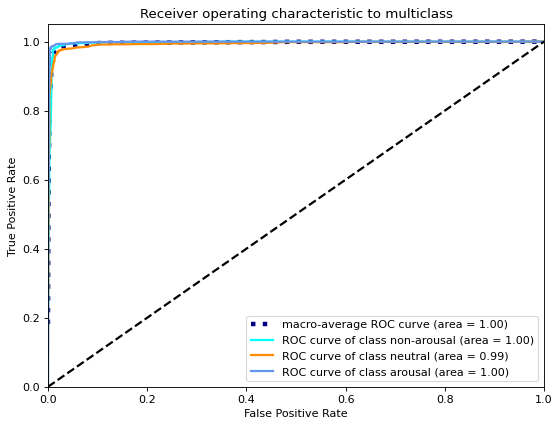

Running 2-fold iteration: 2



<Figure size 432x288 with 0 Axes>

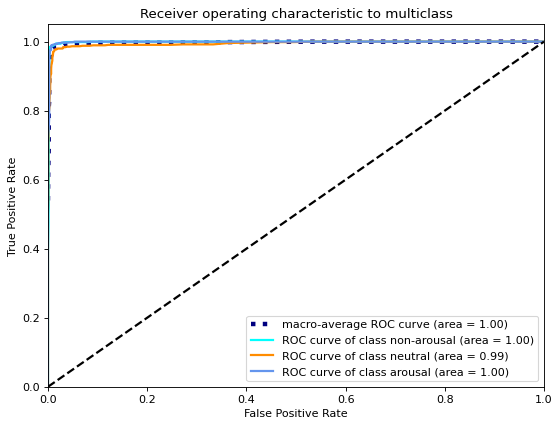


Avg. k-fold metrics: ----> 
Accuracy: 0.978696
AUC: 0.996825
F1: 0.978744
Recall: 0.978696
Precision: 0.978885
Specificity: 0


----------------------------------------------------
----------------------------------------------------
Train Studies:  SIM1 & Modality: PP
----------------------------------------------------
----------------------------------------------------


------------------------ Test Study: SIM2 ------------------------


<Figure size 432x288 with 0 Axes>

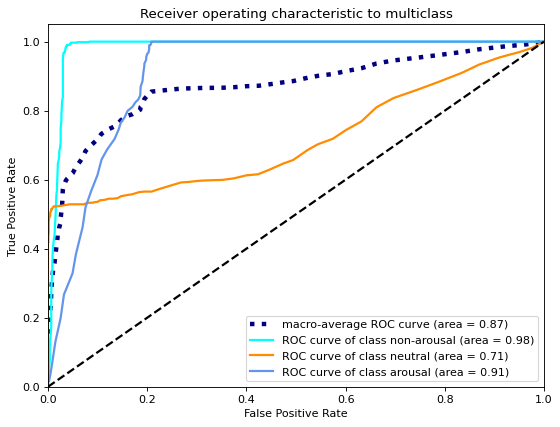

----------------------------------------------------
----------------------------------------------------
Train Studies:  SIM1 & Modality: PP
----------------------------------------------------
----------------------------------------------------


------------------------ Test Study: TT1 ------------------------


<Figure size 432x288 with 0 Axes>

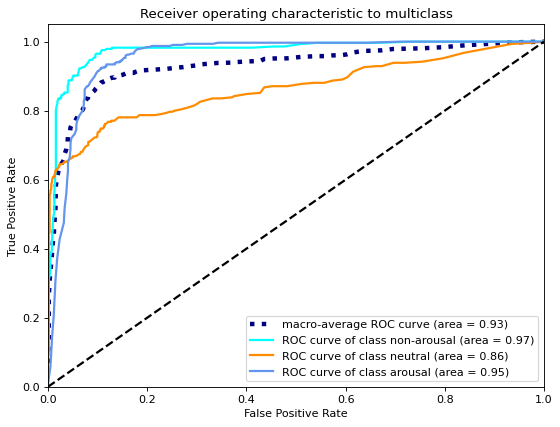

----------------------------------------------------
----------------------------------------------------
Train Studies:  SIM1 & Modality: PP
----------------------------------------------------
----------------------------------------------------


------------------------ Test Study: OFFICE_TASKS ------------------------


<Figure size 432x288 with 0 Axes>

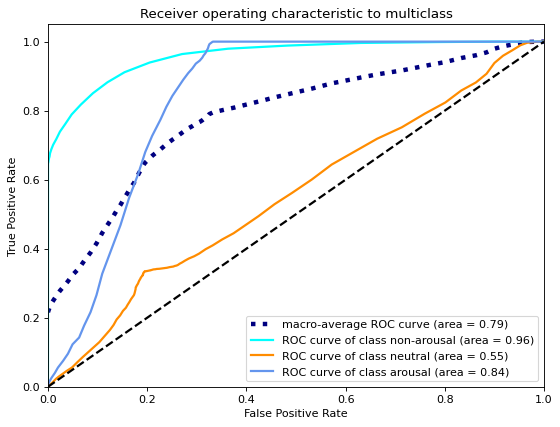

,Model,Arousal_Signal,Train_Study,Test_Study,Train_Accuracy,Test_Accuracy,Train_AUC,Test_AUC,Train_F1,Test_F1,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_Specificity,Test_Specificity,Test_FPR,Test_TPR
0,rf,PP,sim1,sim2,0.978696,0.827313,0.996825,0.869785,0.978744,0.810644,0.978696,0.827313,0.978885,0.870009,0.0,0.0,"{0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014...","{0: [0.0, 0.0015290519877675841, 0.00611620795..."
1,rf,PP,sim1,tt1,0.978696,0.835706,0.996825,0.931195,0.978744,0.833854,0.978696,0.835706,0.978885,0.837367,0.0,0.0,"{0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{0: [0.0, 0.0035087719298245615, 0.00701754385..."
2,rf,PP,sim1,office_tasks,0.978696,0.645058,0.996825,0.785712,0.978744,0.628089,0.978696,0.645058,0.978885,0.684386,0.0,0.0,"{0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","{0: [0.0, 0.0009530617107457708, 0.00595663569..."


In [214]:
start_time = time.time()

for study_combination in study_combinations_to_run:
    
    train_studies = study_combinations[study_combination]['Train']
    test_studies = study_combinations[study_combination]['Test']
    # print(train_studies, test_studies, study_combination)
    
    # if '___'.join(train_studies) in all_study_combinations:
    train_df = all_studies_df.copy()[all_studies_df.Study_Name.isin(train_studies)]
    model_metrics = {}
    final_prediction_df = pd.DataFrame()

    for arousal_signal in arousal_signals:

        train_df = all_studies_df.copy()[all_studies_df.Study_Name.isin(train_studies)]
        # if ground_truth_method == 'ecdf': 
        # if discard_neutral: 
        #     train_df = train_df[train_df[arousal_signal+'_Arousal_Mode'] != 'neutral']

        try:
            print_train_info(study_combination, arousal_signal)
            
            # Ref: https://stackoverflow.com/questions/3975376/understanding-dict-copy-shallow-or-deep
            model_metrics[arousal_signal] = {
                'K_Fold': copy.deepcopy(all_metrics_roc),
                'Train': copy.deepcopy(all_metrics_roc),
                'Test': {}
            }

            # print(train_df[arousal_signal+'_Arousal_Mode'].unique())
            model = get_trained_model(train_df, arousal_signal)

            # for i, test_study in enumerate(test_studies):
            for j in range(1, len(test_studies)+1):
                for subset in itertools.combinations(test_studies, j):

                    test_study_subset = list(subset)
                    test_study_str = '___'.join(test_study_subset)

                    if test_study_str in all_study_combinations:

                        # print_train_info(study_combination, arousal_signal)
                        print('\n------------------------ Test Study: ' + test_study_str.upper() + ' ------------------------')

                        model_metrics[arousal_signal]['Test'][test_study_str.upper()] = copy.deepcopy(all_metrics_roc)
                        # test_df = all_studies_df.copy()[all_studies_df.Study_Name.isin(test_study_subset)]
                        test_df = all_studies_df.copy()[all_studies_df.Study_Name == test_study_str]

                        # if ground_truth_method == 'ecdf':
                        # if discard_neutral: 
                        #     test_df = test_df[test_df[arousal_signal+'_Arousal_Mode'] != 'neutral']
                        prediction_df = test_model(model, test_study_str.upper(), test_df, arousal_signal)

                        final_prediction_df = final_prediction_df.append(prediction_df)
                        metrics_df = metrics_df.append(get_test_study_metrics_df(arousal_signal, study_combination, test_study_str, model_metrics), ignore_index = True)

            if not test_studies: metrics_df = metrics_df.append(get_test_study_metrics_df(arousal_signal, study_combination, None, model_metrics), ignore_index = True)

        except Exception as e:
            print("An exception occurred for %s %s --> %s" % (study_combination, arousal_signal, e))


    # pprint.pprint(model_metrics)
    # overleaf_final_tables[study_combination] = get_overleaf_table(study_combination, model_metrics)
    study_combination_model_metrics[study_combination] = model_metrics

    
display(metrics_df)
metrics_file_name = '_classification_deadline_____' if is_deadline else '_classification_____'
metrics_df.to_csv(add_path(all_studies_data_dir, metrics_dir) + model_name + metrics_file_name + get_date_time() + '.csv', sep=',', index=False)


end_time = time.time()

In [215]:
modeling_time = end_time - start_time
print("--- Total Time %s mins (%s hours) ---" % (modeling_time//60, modeling_time//3600))


# --- Total Time 25.0 mins (0.0 hours) ---


--- Total Time 0.0 mins (0.0 hours) ---


In [216]:
# plt.plot(
#         metrics_df['Test_FPR'][2]["macro"],
#         metrics_df['Test_TPR'][2]["macro"],
#         label="macro-average ROC curve (area = {0:0.2f})".format(metrics_df['Test_AUC'][2]),
#         color="navy",
#         linestyle=":",
#         linewidth=4,
#     )

# plt.legend(loc="lower right")